# Spectral and total absorption rate (ExoPhot Working Group 4)

**1) Load libraries and functions to compute spectral absorption rate**

Load libraries and functions

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from os import walk
from pathlib import Path



import sys
sys.path.append("..")
from codes import spectral_overlap_functions as sof # .py file with functions needed to quantify spectral overlap

#import spectral_overlap_functions as sof # .py file with functions needed to quantify spectral overlap

Define functions that will be handy

In [2]:
def plot_spectra(wl, sigma_int, spec_abs_rate_int, abs_rate, ax):
    """Helper function to plot absorption cross section
    and spectral absorption rate"""
    
    ax.plot(wl, sigma_int)
    ax1=ax.twinx()
    
    ax1.plot(wl, spec_abs_rate_int, c = 'tab:orange')
    ax.set_ylim(0,None)
    ax.autoscale(enable=True, axis='x', tight=True)
    ax1.set_ylim(0,None)
    ax1.autoscale(enable=True, axis='x', tight=True)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-1, 1), useOffset=False)
    ax1.ticklabel_format(axis='y', style='sci', scilimits=(-1, 1), useOffset=False)
    
    ax.set_title(pigm[:-4] + ' in \n' + atmos[:-4])
    ax.set_ylabel('Absorption \n Cross section (cm$^{2}$)',color = 'tab:blue')
    ax1.set_ylabel('Spectral Absorption \n Rate ($\AA^{-1}$ s$^{-1}$)',color = 'tab:orange')
    ax.set_xlabel('Wavelength ($\AA$)')    
    
    abs_str = '{:.2f}'.format(abs_rate)
    ax.text(0.01, 0.85, 'Abs. Rate ($\gamma_t$):\n ' + abs_str + ' s$^{-1}$', horizontalalignment='left', 
         verticalalignment='center',color= 'gray', transform=ax.transAxes)


Retrieve star parameteres

In [7]:
# load auxiliary file containing solar radii (Rs) and habitable zone (hz) boundaries (inner, mid, outer) for different solar spectral types
df_exo = pd.read_csv('../input/exosys_params.csv', comment = '#')
df_exo


,ST,Teff,Rs,Ls,hzi,hzm,hzo,S_hzi,S_hzm,S_hzo
0,a5v,8250.0,1.700,12.083850,2.503394,3.464906,3.911554,2624.57,1370.042,1075.024
1,f5v,6500.0,1.300,2.722901,1.188345,1.644768,1.856789,2624.57,1370.042,1075.024
2,g2v,5750.0,1.000,0.986650,0.715333,0.990080,1.117707,2624.57,1370.042,1075.024
3,k5v,4250.0,0.720,0.152655,0.281373,0.389444,0.439646,2624.57,1370.042,1075.024
4,m8v,2500.0,0.121,0.000516,0.016362,0.022646,0.025566,2624.57,1370.042,1075.024


**2) Example of usage for a single combination of star, atmosphere and pigment**

In [14]:
# specify file names
atmos = 'atm_g2v_hzm_os1.txt'
star = 'SED_g2v.txt'
pigm = 'ChlA.txt'


Stype, Rs, sma, S = sof.get_exo_params(atmos, df_exo)


# Exoplanet system parameters (Sun/Earth pair)
Rs = 696340 # stellar radius in km
sma = 1.496e8 # Exoplanet orbital semi-major axis in km


# folders containing input files
folders = ['../input/stellar/', '../input/atmosphere/', '../input/pigments/']

# read files to retrieve spectra
flux, trans, epsilon = sof.read_files(folders[0] + star, folders[1] + atmos, folders[2] + pigm)

# compute spectral and total absorption rates and ppfd
spectra, rates = sof.spectral_overlap(flux, trans, epsilon, Rs, sma)

# save results
sof.save_results(star, atmos, pigm, Rs, sma, S, spectra, rates)

# plot spectra
wl, F, T, sigma, rho_l = np.hsplit(spectra, spectra.shape[1])

fig, ax = plt.subplots(1,1,figsize=(5,3.5))
plot_spectra(wl, sigma, rho_l, rates[0], ax)

plt.tight_layout()
#plt.savefig('spectral_overlap_plot.jpg', dpi = 300)
plt.show()   


ValueError: too many values to unpack (expected 4)

**3) Example of usage for several combinations of stars, atmospheres and pigments**

Retrieve names of files with star flux, atmosphere transmitance and pigment absorption spectra

In [12]:
# --------------------------------------------------------------------
# Lists of atmospheres, pigments and stellar models files
# --------------------------------------------------------------------

# folders containing input files
folders = ['../input/stellar/', '../input/atmosphere/', '../input/pigments/']

# Read and store the names of all files
_, _, names_star = next(walk(folders[0]))
_, _, names_atmos = next(walk(folders[1]))
_, _, names_pigm = next(walk(folders[2]))

# check file names
names_atmos, names_star, names_pigm

(['atm_a5v_hzm_os1.txt',
  'atm_a5v_hzm_os2.txt',
  'atm_a5v_hzm_os3.txt',
  'atm_a5v_hzm_os4.txt',
  'atm_g2v_hzi_os1.txt',
  'atm_g2v_hzi_os2.txt',
  'atm_g2v_hzi_os3.txt',
  'atm_g2v_hzi_os4.txt',
  'atm_g2v_hzm_os1.txt',
  'atm_g2v_hzm_os2.txt',
  'atm_g2v_hzm_os3.txt',
  'atm_g2v_hzm_os4.txt',
  'atm_g2v_hzo_os1.txt',
  'atm_g2v_hzo_os2.txt',
  'atm_g2v_hzo_os3.txt',
  'atm_g2v_hzo_os4.txt',
  'atm_m8v_hzm_os1.txt',
  'atm_m8v_hzm_os2.txt',
  'atm_m8v_hzm_os3.txt',
  'atm_m8v_hzm_os4.txt'],
 ['SED_a5v.txt', 'SED_g2v.txt', 'SED_m8v.txt'],
 ['BChlA.txt', 'BChlB.txt', 'ChlA.txt', 'ChlB.txt', 'Phot0-Zn.txt'])

ValueError: too many values to unpack (expected 4)

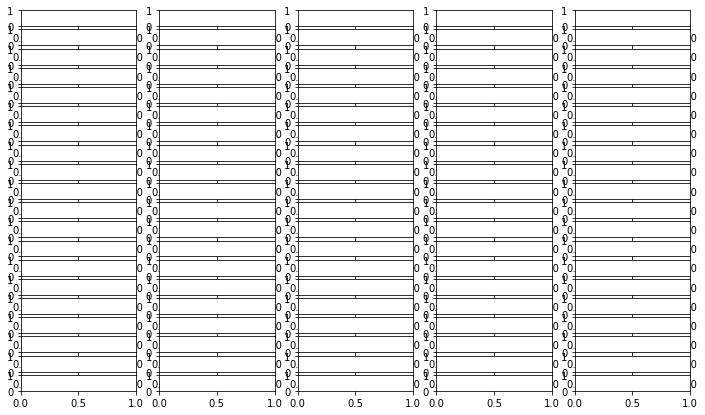

In [13]:
# iterate through atmosphere and pigment file names:
r1 = range(len(names_atmos))
r2 = range(len(names_pigm))

fig, ax = plt.subplots(len(names_atmos),len(names_pigm),figsize=(12,7))

for ii, jj in itertools.product(r1,r2): # this is a nested loop
    # select atmosphere and pigment file names
    atmos = names_atmos[ii]
    pigm =  names_pigm[jj]
    
    # the stellar model file and the exoplanet system parameters (Rs and sma) depend on the atmosphere file
    Stype, Rs, sma, S = sof.get_exo_params(atmos, df_exo)
    star = 'SED_' + Stype + '.txt' 
    
    # read files to retrieve spectra
    flux, trans, epsilon = sof.read_files(folders[0] + star, folders[1] + atmos, folders[2] + pigm)

    # compute spectral and total absorption rates and ppfd
    spectra, rates = sof.spectral_overlap(flux, trans, epsilon, Rs, sma)

    # save results
    sof.save_results(star, atmos, pigm, Rs, sma, S, spectra, rates)
        
    # plot spectra
    wl, F, T, sigma, rho_l = np.hsplit(spectra, spectra.shape[1])
    plot_spectra(wl, sigma, rho_l, rates[0], ax[ii,jj])

plt.tight_layout()
#plt.savefig('spectral_overlap_plot_multiple.jpg', dpi = 300)
plt.show()  
